In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 4.5 MB/s 


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [ ]:
print(sklearn.__version__)

1.0.2


In [ ]:
ss = StandardScaler()

In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/car data.csv")

In [ ]:
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
ds = ds.drop('Car_Name', axis=1)

In [ ]:
ds.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
ds['n_years'] = [2022-i for i in ds['Year']]

In [ ]:
ds.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,n_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [ ]:
ds = ds.drop('Year', axis=1)

In [ ]:
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,n_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [ ]:
ds.dtypes

Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
n_years            int64
dtype: object

In [ ]:
ds.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,n_years
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
n_years,-0.236141,0.047584,0.524342,0.182104,1.000000


In [ ]:
ds['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
ds['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
ds['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
ds['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [ ]:
ds['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
ds['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
ds['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
le = LabelEncoder()

trans = np.array(ds['Transmission'])
coded_trans = le.fit_transform(trans)

# Manual -> 1 & Automatic -> 0
ds['transmission'] = coded_trans.reshape(-1, 1)

In [ ]:
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,n_years,transmission
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8,1


In [ ]:
ds = ds.drop('Transmission', axis=1)

In [ ]:
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Owner,n_years,transmission
0,3.35,5.59,27000,Petrol,Dealer,0,8,1
1,4.75,9.54,43000,Diesel,Dealer,0,9,1
2,7.25,9.85,6900,Petrol,Dealer,0,5,1
3,2.85,4.15,5200,Petrol,Dealer,0,11,1
4,4.60,6.87,42450,Diesel,Dealer,0,8,1


In [ ]:
ftype = np.array(ds['Fuel_Type'])

coded_ftype = le.fit_transform(ftype)

ds = pd.get_dummies(ds)
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,n_years,transmission,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual
0,3.35,5.59,27000,0,8,1,0,0,1,1,0
1,4.75,9.54,43000,0,9,1,0,1,0,1,0
2,7.25,9.85,6900,0,5,1,0,0,1,1,0
3,2.85,4.15,5200,0,11,1,0,0,1,1,0
4,4.60,6.87,42450,0,8,1,0,1,0,1,0


In [ ]:
ds = ds.drop('Fuel_Type_CNG', axis=1)

In [ ]:
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,n_years,transmission,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual
0,3.35,5.59,27000,0,8,1,0,1,1,0
1,4.75,9.54,43000,0,9,1,1,0,1,0
2,7.25,9.85,6900,0,5,1,0,1,1,0
3,2.85,4.15,5200,0,11,1,0,1,1,0
4,4.60,6.87,42450,0,8,1,1,0,1,0


In [ ]:
ds['Seller_Type'] = ds['Seller_Type_Dealer']

In [ ]:
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,n_years,transmission,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Seller_Type
0,3.35,5.59,27000,0,8,1,0,1,1,0,1
1,4.75,9.54,43000,0,9,1,1,0,1,0,1
2,7.25,9.85,6900,0,5,1,0,1,1,0,1
3,2.85,4.15,5200,0,11,1,0,1,1,0,1
4,4.60,6.87,42450,0,8,1,1,0,1,0,1


In [ ]:
ds = ds.drop('Seller_Type_Individual', axis=1)

In [ ]:
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,n_years,transmission,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type
0,3.35,5.59,27000,0,8,1,0,1,1,1
1,4.75,9.54,43000,0,9,1,1,0,1,1
2,7.25,9.85,6900,0,5,1,0,1,1,1
3,2.85,4.15,5200,0,11,1,0,1,1,1
4,4.60,6.87,42450,0,8,1,1,0,1,1


In [ ]:
ds = ds.drop('Seller_Type_Dealer', axis=1)

In [ ]:
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,n_years,transmission,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type
0,3.35,5.59,27000,0,8,1,0,1,1
1,4.75,9.54,43000,0,9,1,1,0,1
2,7.25,9.85,6900,0,5,1,0,1,1
3,2.85,4.15,5200,0,11,1,0,1,1
4,4.60,6.87,42450,0,8,1,1,0,1


In [ ]:
sprice = np.array(ds['Kms_Driven']).reshape(-1, 1)

scaled_sprice = ss.fit_transform(sprice)
scaled_sprice[:5]

array([[-0.25622446],
       [ 0.1559105 ],
       [-0.77396901],
       [-0.81775835],
       [ 0.14174336]])

In [ ]:
ds['km_driven'] = scaled_sprice

In [ ]:
#ds = ds.drop('selling_price', axis=1)
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,n_years,transmission,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type,km_driven
0,3.35,5.59,27000,0,8,1,0,1,1,-0.256224
1,4.75,9.54,43000,0,9,1,1,0,1,0.155911
2,7.25,9.85,6900,0,5,1,0,1,1,-0.773969
3,2.85,4.15,5200,0,11,1,0,1,1,-0.817758
4,4.60,6.87,42450,0,8,1,1,0,1,0.141743


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


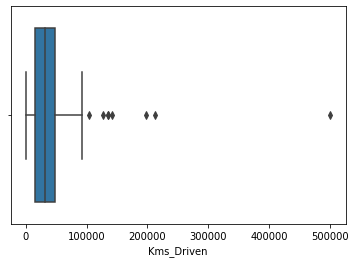

In [ ]:
sns.boxplot(ds['Kms_Driven'])

In [ ]:
ds = ds.drop('Kms_Driven', axis=1)

In [ ]:
ds.head()

,Selling_Price,Present_Price,Owner,n_years,transmission,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type,km_driven
0,3.35,5.59,0,8,1,0,1,1,-0.256224
1,4.75,9.54,0,9,1,1,0,1,0.155911
2,7.25,9.85,0,5,1,0,1,1,-0.773969
3,2.85,4.15,0,11,1,0,1,1,-0.817758
4,4.60,6.87,0,8,1,1,0,1,0.141743


In [ ]:
# For testing purpose, not part of code
p = {
    'Name': ['usama', 'zain', 'taseer'],
     'Age': [23, 20, 20],
     }

test = pd.DataFrame(p, columns=['Name', 'Age'], index=['1', '2', '3'])
#test = test.drop([''], axis=0)

out = []

for i in range(len(test['Age'])):
  if test['Age'][i] < 23:
    out.append(test['Name'][i])

out
#test.drop(test['Age'].value>20)

['zain', 'taseer']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


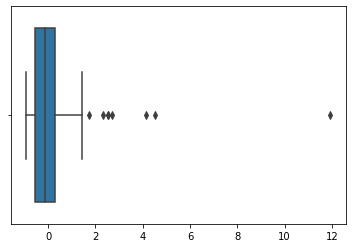

In [ ]:
sns.boxplot(ds['km_driven'].values)

In [ ]:
# Targets !!!!
# find & learn Quantile and threshold
# Learn seaborn
# Finish Preprocessing

In [ ]:
ds

,Selling_Price,Present_Price,Owner,n_years,transmission,Fuel_Type_Diesel,Fuel_Type_Petrol,km_driven
0,3.35,5.59,0,8,1,0,1,-0.256224
1,4.75,9.54,0,9,1,1,0,0.155911
2,7.25,9.85,0,5,1,0,1,-0.773969
3,2.85,4.15,0,11,1,0,1,-0.817758
4,4.60,6.87,0,8,1,1,0,0.141743
...,...,...,...,...,...,...,...,...
296,9.50,11.60,0,6,1,1,0,-0.076225
297,4.00,5.90,0,7,1,0,1,0.593804
298,3.35,11.00,0,13,1,0,1,1.313340
299,11.50,12.50,0,5,1,1,0,-0.719876


In [ ]:
X = np.array(ds.drop('Selling_Price', axis=1))
y = np.array(ds['Selling_Price'])

In [ ]:
X[:5], y[:5] 

(array([[ 5.59      ,  0.        ,  8.        ,  1.        ,  0.        ,
          1.        , -0.25622446],
        [ 9.54      ,  0.        ,  9.        ,  1.        ,  1.        ,
          0.        ,  0.1559105 ],
        [ 9.85      ,  0.        ,  5.        ,  1.        ,  0.        ,
          1.        , -0.77396901],
        [ 4.15      ,  0.        , 11.        ,  1.        ,  0.        ,
          1.        , -0.81775835],
        [ 6.87      ,  0.        ,  8.        ,  1.        ,  1.        ,
          0.        ,  0.14174336]]), array([3.35, 4.75, 7.25, 2.85, 4.6 ]))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
x_train[:3], x_test[:3]

(array([[ 7.6       ,  0.        ,  8.        ,  1.        ,  1.        ,
          0.        ,  1.04797663],
        [11.8       ,  0.        ,  6.        ,  1.        ,  0.        ,
          1.        , -0.71961871],
        [ 2.69      ,  0.        , 10.        ,  1.        ,  0.        ,
          1.        ,  0.33621955]]),
 array([[ 9.4       ,  0.        ,  7.        ,  1.        ,  1.        ,
          0.        ,  0.6293763 ],
        [ 0.826     ,  0.        , 11.        ,  1.        ,  0.        ,
          1.        , -0.7971516 ],
        [ 5.7       ,  0.        ,  7.        ,  1.        ,  0.        ,
          1.        , -0.31603555]]))

In [ ]:
y_train[:3], y_test[:3]

(array([6.  , 8.99, 1.25]), array([8.25, 0.5 , 5.25]))

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
score = mean_squared_error(y_test, y_pred)
score2 = r2_score(y_test, y_pred)
score, score2

(4.432128265667616, 0.8517983059778264)

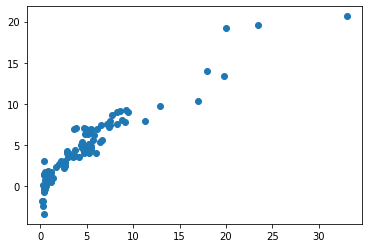

In [ ]:
plt.scatter(y_test, y_pred)
#bbvy_sh = y.reshape(-1, 1)

In [ ]:
import pickle

In [ ]:
pickle.dump(lr, open("car_price_predictor.sav", "wb"))

In [ ]:
model = pickle.load(open("/content/car_price_predictor.sav", "rb"))

In [ ]:
ds.head()

,Selling_Price,Present_Price,Owner,n_years,transmission,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type,km_driven
0,3.35,5.59,0,8,1,0,1,1,-0.256224
1,4.75,9.54,0,9,1,1,0,1,0.155911
2,7.25,9.85,0,5,1,0,1,1,-0.773969
3,2.85,4.15,0,11,1,0,1,1,-0.817758
4,4.60,6.87,0,8,1,1,0,1,0.141743


In [ ]:
st = ss.fit_transform([[11000]])

model.predict([[9.85, 0, 8, 1, 0, 1, 0, st[0][0]]])

array([4.14768529])